# Lab 6- ML Intro 1: Regression
## Summary
Based on Chapter 2 from Geron's book, Hands-on Machine Learning with Scikit-Learn Keras & Tensorflow

In this lecture we will review a regression example for the Housing DataSet
* Examining data
    * Learning to use Pandas
* Preparing data
    * Using scikit-learn tools to remove outliers
* Feature Engineering
    * Creating new features from existing ones
* Using PipeLines
    * Creating a dataflow structure to automatize the processing
* Improving predictions
    * Trying different variations to tune the models

## Loading modules

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/dtrad/geoml_course/blob/master/Practice6-IntroToML.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
#print('directory',os.environ['PWD'])
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Loading and examining data

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
!pwd

/home/dtrad/disk2/geoml_course


In [5]:
ls datasets/housing

housing.csv  housing.tgz


In [6]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):    
    csv_path = os.path.join(housing_path, "housing.csv")
    print("reading %s"%csv_path)
    return pd.read_csv(csv_path)

In [7]:
housing=load_housing_data()
print("created a panda object",type(housing))
housing.head()

reading datasets/housing/housing.csv
created a panda object <class 'pandas.core.frame.DataFrame'>


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [11]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

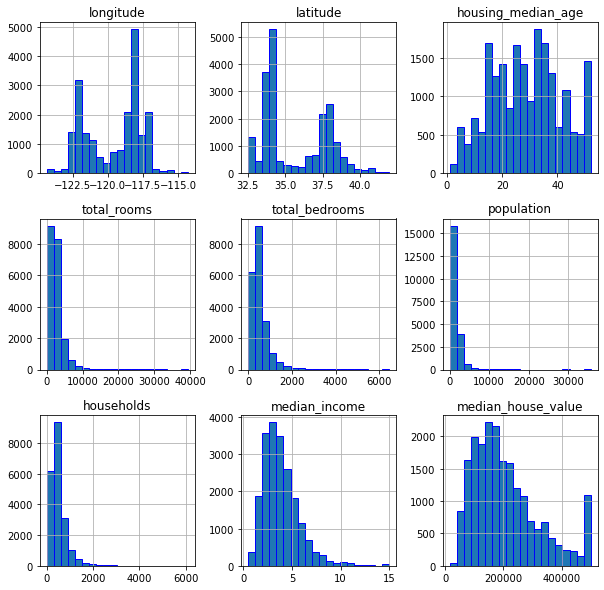

In [12]:
housing.hist(bins=20,figsize=(10,10),edgecolor='b')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<AxesSubplot:>

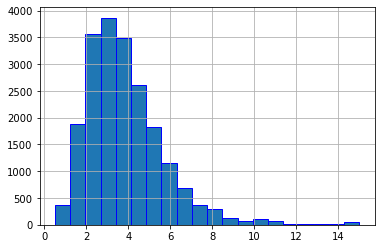

In [14]:
housing["median_income"].hist(edgecolor='b',bins=20)

In [15]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [16]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [17]:
(housing.keys())

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

<AxesSubplot:>

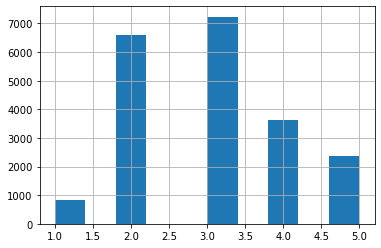

In [18]:
housing.income_cat.hist()

Let us use a Stratified ShuffleSplit cross-validator that provides train/test indices to split data in train/test sets.

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [22]:
#split.split?

In [23]:
type(strat_train_set),type(split),type(housing)

(pandas.core.frame.DataFrame,
 sklearn.model_selection._split.StratifiedShuffleSplit,
 pandas.core.frame.DataFrame)

In [24]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


Categoricals are a pandas data type corresponding to categorical variables in statistics. \
A categorical variable takes on a limited, and usually fixed, number of possible values\

In [25]:
strat_train_set.income_cat.value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [26]:
strat_test_set.income_cat.value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Now we can some visualization and also some data preparation. We start with a fresh copy form strat_train_set.

In [27]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3


In [28]:
housing=strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

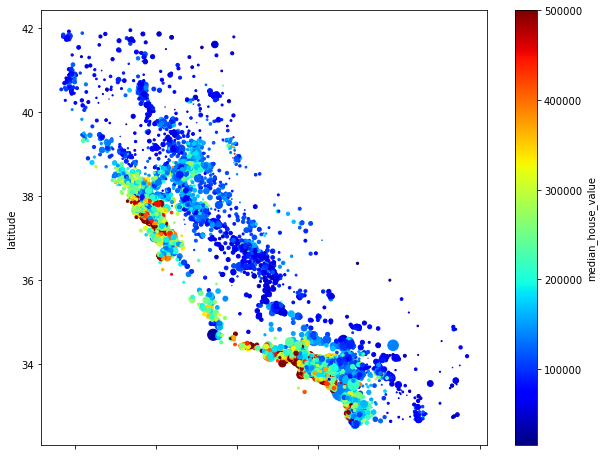

In [31]:
housing.plot(kind='scatter',y='latitude',x='longitude',c='median_house_value',cmap='jet',s=housing.population/100,figsize=(10,8))

We want to check which features have more correlation with house values.

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [33]:
corr_matrix=housing.corr()

Notice that only numerical values can be used for this, so we only have the cross-correlation for 9 features.

In [34]:
print(corr_matrix.shape)
print(type(corr_matrix))

(9, 9)
<class 'pandas.core.frame.DataFrame'>


In [35]:
corr_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, longitude to median_house_value
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           9 non-null      float64
 1   latitude            9 non-null      float64
 2   housing_median_age  9 non-null      float64
 3   total_rooms         9 non-null      float64
 4   total_bedrooms      9 non-null      float64
 5   population          9 non-null      float64
 6   households          9 non-null      float64
 7   median_income       9 non-null      float64
 8   median_house_value  9 non-null      float64
dtypes: float64(9)
memory usage: 1020.0+ bytes


In [36]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Let us take the top four and plot them using scatter_matrix

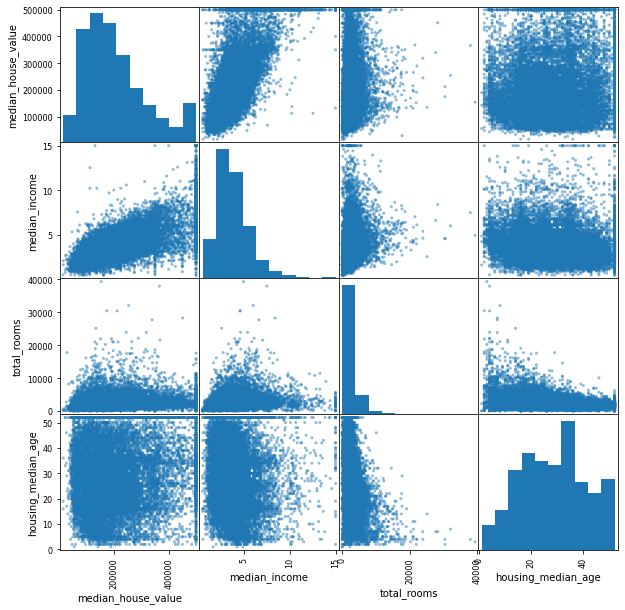

In [37]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(10,10));

Clearly, median income is a good feature to keep an eye on, but also there are other like total rooms for example. \
Now, the total number of rooms in the discrict is a bit vague. Maybe we can do feature engineering, converted to something more useful.\
Let us normalize it by the houses in the district.

In [38]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [39]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [40]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [41]:
corr_matrix=housing.corr()

In [42]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

We increase the correlation 1%. Maybe not as good as expected but on the right direction. \
Notice that we are increasing the number of attributes and making this a bigger problem. \
We can check on the data features using keys.

In [43]:
print(len(housing.keys()))
print(housing.keys())

14
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')


## Preparing data
We will add these attributes later again but setting everything as a pipeline dataflow.\
But first let us check for features that could cause problems for ML algorithms.\
There are two problems: a) missing values b) features that do not map to numbers.\
Also, we need to separate from the data the features we want to use for labels and leave only the features used for calculation

Let us remove the label from the data and create a "series" (dataframe with one feature) to use in fitting.\
We will do this in a fresh data set directly from the train_set generator.\
(we lose the new attributes we added before but they will be later added in the pipeline)

In [44]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [45]:
print(type(strat_train_set),strat_train_set.shape)
print(type(housing),housing.shape)
print(type(housing_labels),housing_labels.shape)

<class 'pandas.core.frame.DataFrame'> (16512, 11)
<class 'pandas.core.frame.DataFrame'> (16512, 10)
<class 'pandas.core.series.Series'> (16512,)


Let us check the first instances for labels and data

In [46]:
housing_labels[:5]

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [47]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3


In [48]:
print(len(housing.keys()))
print(housing.keys())

10
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'income_cat'],
      dtype='object')


Need to check for missing entries and remove them from the data or fill them up before ML algorithms

In [49]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,5
...,...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND,3
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN,3
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,<1H OCEAN,4
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,NEAR OCEAN,3


In [50]:
sample_incomplete_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1606 to 13336
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           158 non-null    float64 
 1   latitude            158 non-null    float64 
 2   housing_median_age  158 non-null    float64 
 3   total_rooms         158 non-null    float64 
 4   total_bedrooms      0 non-null      float64 
 5   population          158 non-null    float64 
 6   households          158 non-null    float64 
 7   median_income       158 non-null    float64 
 8   ocean_proximity     158 non-null    object  
 9   income_cat          158 non-null    category
dtypes: category(1), float64(8), object(1)
memory usage: 12.7+ KB


There are several options, like drop the samples, drop the attributes or assign to them new values (interpolate them).\
In this case we will fill them up with the median of all the other variables using the class Imputer.\
This class will detect missing values (default Nan) by a pre-specified value (strategy) for each attribute

In [52]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [54]:
#imputer?

In [56]:
#but need to take out the string keys where the median does not work
housing_num = housing.drop("ocean_proximity", axis=1)

In [57]:
X=imputer.fit_transform(housing_num)

In [58]:
type(X),X.shape

(numpy.ndarray, (16512, 9))

The output from inputer is a ndarray, so we need to rebuild a panda dataframe. \
Notice this is very common, many scikit-learn methods take as input a PD but return ndarrays.\
Lukely, creating dataframes from numpy is easy but we need to specify the original index and feature names.


In [59]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)

This data frame is the same as before except that the incomplete rows are filled in by the imputer.\
We can use the indexes from the original PD to access the values in the new PD after imputing.

In [61]:
housing.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,5
...,...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND,3
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN,3
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,<1H OCEAN,4
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,NEAR OCEAN,3


In [60]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,2.0
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,3.0
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,3.0
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,3.0
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,5.0
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,433.0,3207.0,1012.0,4.0767,3.0
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667,3.0
9149,-118.50,34.46,17.0,10267.0,433.0,4956.0,1483.0,5.5061,4.0
16757,-122.48,37.70,33.0,4492.0,433.0,3477.0,1537.0,3.0546,3.0


Let us check again, we got not left null values

In [62]:
housing_tr[housing_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat


In [63]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   income_cat          16512 non-null  float64
dtypes: float64(9)
memory usage: 1.8 MB


Compare with the previous PD:

In [64]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.8+ MB


Notice that we missing the ocean_proximiity and income_cat was converted to a number. We could added them back but the income_cat was mostly for splitting. \
The ocean_proximity could be important and can be added by using hot_encoding or embeding. \
To keep this lecture simple, we will not do it here.

## Building a dataflow
All these operations we did are going to be difficult to remember every time we have more data.\
sklearn provides pipelines, that are structures of processing steps.\
These processing steps have to be encapsulated in a method or a class.\
Therefore we need to create a class for the steps we did before of adding features. \
We need to follow the skitlearn structure of transformers for this class to be usable in a pipeline \
That means our class needs:
* a fit method
* a transform method
* a combined fit_transform method

The last one, can be inherited from a base class "TransformerMixin". \
In addition we needs other methods and attributes that can be inherited from the BaseEstimator class.

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

# for compactness let us define column indexes for each attribute we are adding
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        #print("class CombinedAttributesAdder: input is a ",type(X))
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [66]:
# Reminder, concatenating np.arrays with np.c_ 
aa=np.array([1,2])
bb=np.array([3,4])
aa=aa[:,np.newaxis]
bb=bb[:,np.newaxis]
cc=np.c_[aa,bb]
print(aa.shape,bb.shape,cc.shape)
print(cc)

(2, 1) (2, 1) (2, 2)
[[1 3]
 [2 4]]


Now we have all the classes we need. Let us build the dataflow:

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# arguments are a list of processes. Each process is set on a tuple (name, class)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

All methods are run by one call to the fit_transform. The data themselves are the glue that connects the processes

In [68]:
housing_tr = num_pipeline.fit_transform(housing_num)

Once again, we input a dataframe but the output is a ndarray.

In [69]:
# housing num the input is a dataframe
print(type(housing_num),housing_num.shape)
# but housing_tr is a ndarray (not dataframe)
print(type(housing_tr),housing_tr.shape)

<class 'pandas.core.frame.DataFrame'> (16512, 9)
<class 'numpy.ndarray'> (16512, 12)


Think of pipelines as a line of processes connected through pipes.\
Pipes are the typical communication method between programs in linux.\
Also, in R pipes a similar pipeline mechanism is common. \
Pipelines are common in other environments, for example seismic processing packages.


## Different Regression Algorithms
We will start from the housing_num frame where we already dropped the non-numerical column ocean proximity.

In [70]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3


Let us make sure we didn't change the order or index:

In [71]:
print(type(housing_labels))
housing_labels[:5]

<class 'pandas.core.series.Series'>


12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

### Linear regression and decision tree
For each method we will start from housing with numbers only, run the pipeline that interpolates, adds attributes and scales.\
Then we just apply the linear regression algorithm from sklearn by using fit. 

[3.6355851] [[3.2742619]]


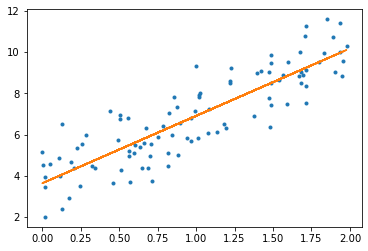

In [73]:
# Review from first class: Example for a linear regresion in sklearn.
from sklearn.linear_model import LinearRegression

#create data
x = 2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)
lin_reg=LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_,lin_reg.coef_)
xn=x;
lin_reg.predict(xn)
yn=lin_reg.predict(xn)
plt.plot(x,y,'.',xn,yn)
plt.show()

In [74]:
from sklearn.linear_model import LinearRegression
housing_prepared=num_pipeline.fit_transform(housing_num)
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [75]:
print("housing_num",housing_num.shape,type(housing_num))
print("housing_prepared",type(housing_prepared),housing_prepared.shape, housing_prepared.dtype)
print("housing_labels",type(housing_labels),housing_labels.shape, housing_labels.dtype)

housing_num (16512, 9) <class 'pandas.core.frame.DataFrame'>
housing_prepared <class 'numpy.ndarray'> (16512, 12) float64
housing_labels <class 'pandas.core.series.Series'> (16512,) float64


<AxesSubplot:>

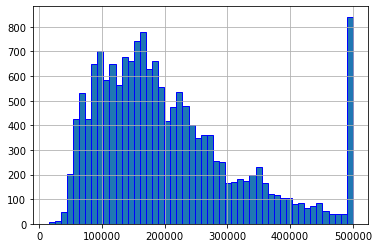

In [76]:
housing_labels.hist(bins=50,edgecolor='b')

In [78]:
# let's try the full preprocessing pipeline
ninstances=housing_num.shape[0]
print(ninstances)
some_data = housing_num.iloc[:ninstances]
some_labels = housing_labels.iloc[:ninstances]
some_data_prepared = num_pipeline.transform(some_data)
predictions=lin_reg.predict(some_data_prepared)
print("labels - predictions\n"),[print('{:.0f}'.format(some_labels.iloc[i]),'{:.0f}'.format(predictions[i])) for i in range(10)]
print()

16512
labels - predictions

72100 88869
279600 303981
82700 165440
112500 176920
238300 234798
165700 199183
412300 378042
349600 264278
181300 142413
500001 24049



In [79]:
housing_labels.shape, predictions.shape

((16512,), (16512,))

In [80]:
print(type(some_data),type(some_labels),type(some_data_prepared),type(predictions))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [81]:
test=housing_labels[housing_labels<500000]
test=test[test>0]
test.shape



(15703,)

In [82]:
test2=predictions[predictions<500000]
test2=test2[test2>0]
test2.shape

(16311,)

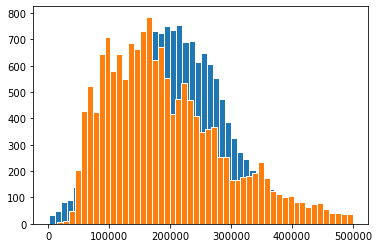

In [85]:
fig, ax = plt.subplots(1)
#ax.hist(predictions,bins=150,edgecolor='b');
#ax.hist(housing_labels,bins=150,edgecolor='w');
ax.hist(test2,bins=50,edgecolor='w');
ax.hist(test,bins=50,edgecolor='w');
#ax.set_xlim(0,500000)

In [86]:
some_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3


Notice the different ways to accessing the data:

In [87]:
print(some_labels.iloc[0])
print(some_labels.loc[0])
print(some_labels.head(1))

72100.0
452600.0
12655    72100.0
Name: median_house_value, dtype: float64


Let us evaluate how good the Mean Squared Error (MSE) is when all data are considered

Now we will evaluate the metric. Since these is a regression problem, we need to evaluate MSE or MAE between predictions and labels.\
We need to put both labels and predictions in the same format. \
Since the pipeline gives numpy, let us transform the Panda series into numpy as well.

In [88]:
housing_labels_np=housing_labels.to_numpy(copy=True)
housing_labels_np[0]

72100.0

In [89]:
from sklearn.metrics import mean_squared_error
housing_prepared=num_pipeline.transform(housing_num)
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels_np, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69122.25474913725

Can you tell why we are using transform instead of fit_transform? 
The score for the linear regressor is not great (we are off by 70K in average). Let us try a decision tree:

In [90]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [91]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

An error of zero it means overfitting, which is characteristic of decision trees.
We need to use a more objective measure than just the data where the regressor was calculated. \
We could use the validation and test datasets.\
Another more automatic way of doing this, is using cross-validation. 


### Cross-Validation
The data are separated on a training and test data sets many times (called the fold), and each time the
algorithm is trained again (see Lecture).\
We need to pass the prediction algorithm, the prepared dataset, the labels, and a score measure. Also, we define the fold.\
The cross_validation class is expecting a function that increases when results are better, so we need to pass a negative MSE.

In [92]:
#cross_val_score?

In [93]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10, n_jobs=10)

To visualize the scores we can use a panda series like this, which has already functions to calculate statistics.

In [94]:
pd.Series(np.sqrt(-tree_scores)).describe()

count       10.000000
mean     73177.269846
std       3102.341464
min      68869.191396
25%      71420.991057
50%      72871.504493
75%      74311.441477
max      79743.999261
dtype: float64

In [95]:
# or we can create a customized function
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [79743.99926065 74396.02315432 72204.37147098 71721.66497946
 70136.88259987 75783.46521699 71320.76641589 74057.69644643
 68869.1913956  73538.63751496]
Mean: 73177.26984551414
Standard deviation: 2943.139531814665


In [96]:
#let us repeat for the linear regressor
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [97]:
display_scores(lin_rmse_scores)

Scores: [72143.3593831  64738.04820492 68195.73349391 69032.50319807
 67088.82546029 72683.81941574 76683.9759963  69254.10833122
 66677.99565826 70326.43881538]
Mean: 69682.48079571823
Standard deviation: 3278.983956640316


We see that the linear regressor in reality did better than the regression tree.\
A regression tree alone is not that powerful to generalize because it tends to overfit. \
We will see in future lectures a more powerful device that uses many trees is a Random forest with majority votes 

In [98]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=10)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_jobs=10, random_state=42)

In [99]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

19053.342804028027

In [100]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error",cv=10)

/home/dtrad/anaconda3/envs/tfgpu/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [101]:
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [53766.41214081 49248.58748608 47348.01364638 52208.85428895
 47860.88590762 52768.60797347 54200.59167354 51240.31309351
 49152.40130264 53860.26158715]
Mean: 51165.492910015586
Standard deviation: 2452.0033054405267


In [102]:
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

107824.0390711765

### Grid Search
We use CV for validation but still we have to fine tune parameters.\
This process could take a long time because each method has many options to optimize.\
To automatize this tuning process skit-learn has a function that can systematically try ranges of parameters
combined with cross-validations


In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8, 10]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42, n_jobs=10)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=10, random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [104]:
# Best parameters
grid_search.best_params_

{'max_features': 10, 'n_estimators': 50}

In [105]:
# Best estimator
grid_search.best_estimator_

RandomForestRegressor(max_features=10, n_estimators=50, n_jobs=10,
                      random_state=42)

In [106]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print('{:.0f}'.format(np.sqrt(-mean_score)), params)

67961 {'max_features': 2, 'n_estimators': 3}
58452 {'max_features': 2, 'n_estimators': 10}
55275 {'max_features': 2, 'n_estimators': 30}
54604 {'max_features': 2, 'n_estimators': 50}
63982 {'max_features': 4, 'n_estimators': 3}
55919 {'max_features': 4, 'n_estimators': 10}
53260 {'max_features': 4, 'n_estimators': 30}
52726 {'max_features': 4, 'n_estimators': 50}
61901 {'max_features': 6, 'n_estimators': 3}
54792 {'max_features': 6, 'n_estimators': 10}
52757 {'max_features': 6, 'n_estimators': 30}
52285 {'max_features': 6, 'n_estimators': 50}
61975 {'max_features': 8, 'n_estimators': 3}
54721 {'max_features': 8, 'n_estimators': 10}
52381 {'max_features': 8, 'n_estimators': 30}
52125 {'max_features': 8, 'n_estimators': 50}
60868 {'max_features': 10, 'n_estimators': 3}
54187 {'max_features': 10, 'n_estimators': 10}
52432 {'max_features': 10, 'n_estimators': 30}
52038 {'max_features': 10, 'n_estimators': 50}
66840 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
57578 {'bootstra

there are ways to search the whole model space that could improve this result but for this test
let us settle with this result:

In [107]:
final_model = grid_search.best_estimator_

Now we will finish the predictions with this estimator.
We will take the strat_test_set and apply the preprocessing:

In [108]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
#but need to take out the string keys where the median does not work
X_test_num = X_test.drop("ocean_proximity", axis=1)
X_test_prepared = num_pipeline.transform(X_test_num)

In [109]:
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [110]:
print(final_rmse)

50189.19034590829


In [111]:
print('predictions, labels')
[print('{:.0f}\t{:.0f}'.format(final_predictions[i], y_test.iloc[i])) for i in range(10)]
print()

predictions, labels
487331	500001
211298	162500
206838	204600
172080	159700
235026	184000
165640	151900
114500	104900
406022	500001
242728	367400
264030	346500



In [112]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.08207035, 0.08047296, 0.05646394, 0.01470313, 0.01431787,
       0.01452259, 0.01472979, 0.4501424 , 0.06894218, 0.04012495,
       0.13244626, 0.03106359])

To relate the feature importances to the attributes, we can start from the test data set or from the housing_num

In [113]:
strat_test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [114]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'income_cat'],
      dtype='object')

In [115]:
temp = strat_test_set.copy()
temp = temp.drop("median_house_value",axis=1)
temp = temp.drop("ocean_proximity", axis=1)
print(temp.columns)
attributes = list(temp.columns)+ ["rooms_per_household", "populations_per_household","bedrooms_rooms"]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'income_cat'],
      dtype='object')


In [116]:
# find missing attributes
len(attributes),len(feature_importances)

(12, 12)

In [117]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4501423962496147, 'median_income'),
 (0.13244626231514753, 'populations_per_household'),
 (0.08207034632761316, 'longitude'),
 (0.08047295922849257, 'latitude'),
 (0.06894217926354985, 'income_cat'),
 (0.05646393763673514, 'housing_median_age'),
 (0.04012494914503729, 'rooms_per_household'),
 (0.031063593369812965, 'bedrooms_rooms'),
 (0.014729789933244862, 'households'),
 (0.01470313052035197, 'total_rooms'),
 (0.014522590351810702, 'population'),
 (0.014317865658589285, 'total_bedrooms')]

## Conclusion
In this notebook, we took a first look at the problem of regression, that is creating a model that can predict a continuous set of values.\
We have gone through the full sequence or examining and loading data, trying different models, and chosing one.\
In practice, there is significantly more effort since most of the steps are the result of previous testing. \
However, in general, you can expect the process to follow a similar structure.\
In the next practice we will look a some simpler cases of classification.